In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("train.csv")

In [4]:
train.columns

Index(['stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size',
       'imbalance_buy_sell_flag', 'reference_price', 'matched_size',
       'far_price', 'near_price', 'bid_price', 'bid_size', 'ask_price',
       'ask_size', 'wap', 'target', 'time_id', 'row_id'],
      dtype='object')

In [15]:
train.describe()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id
count,5.237980e+06,5.237980e+06,5.237980e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237760e+06,2.343638e+06,2.380800e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237892e+06,5.237980e+06
mean,9.928856e+01,2.415100e+02,2.700000e+02,5.715293e+06,-1.189619e-02,9.999955e-01,4.510025e+07,1.001713e+00,9.996601e-01,9.997263e-01,5.181359e+04,1.000264e+00,5.357568e+04,9.999920e-01,-4.756125e-02,1.331005e+04
std,5.787176e+01,1.385319e+02,1.587451e+02,2.051591e+07,8.853374e-01,2.532497e-03,1.398413e+08,7.214705e-01,1.216920e-02,2.499345e-03,1.114214e+05,2.510042e-03,1.293554e+05,2.497509e-03,9.452860e+00,7.619271e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,9.352850e-01,4.316610e+03,7.700000e-05,7.869880e-01,9.349150e-01,0.000000e+00,9.398270e-01,0.000000e+00,9.380080e-01,-3.852898e+02,0.000000e+00
25%,4.900000e+01,1.220000e+02,1.300000e+02,8.453415e+04,-1.000000e+00,9.987630e-01,5.279575e+06,9.963320e-01,9.971000e-01,9.985290e-01,7.374720e+03,9.990290e-01,7.823700e+03,9.987810e-01,-4.559755e+00,6.729000e+03
50%,9.900000e+01,2.420000e+02,2.700000e+02,1.113604e+06,0.000000e+00,9.999670e-01,1.288264e+07,9.998830e-01,9.998890e-01,9.997280e-01,2.196900e+04,1.000207e+00,2.301792e+04,9.999970e-01,-6.020069e-02,1.334500e+04
75%,1.490000e+02,3.610000e+02,4.100000e+02,4.190951e+06,1.000000e+00,1.001174e+00,3.270013e+07,1.003318e+00,1.002590e+00,1.000905e+00,5.583168e+04,1.001414e+00,5.787841e+04,1.001149e+00,4.409552e+00,1.990700e+04
max,1.990000e+02,4.800000e+02,5.400000e+02,2.982028e+09,1.000000e+00,1.077488e+00,7.713682e+09,4.379531e+02,1.309732e+00,1.077488e+00,3.028784e+07,1.077836e+00,5.440500e+07,1.077675e+00,4.460704e+02,2.645400e+04


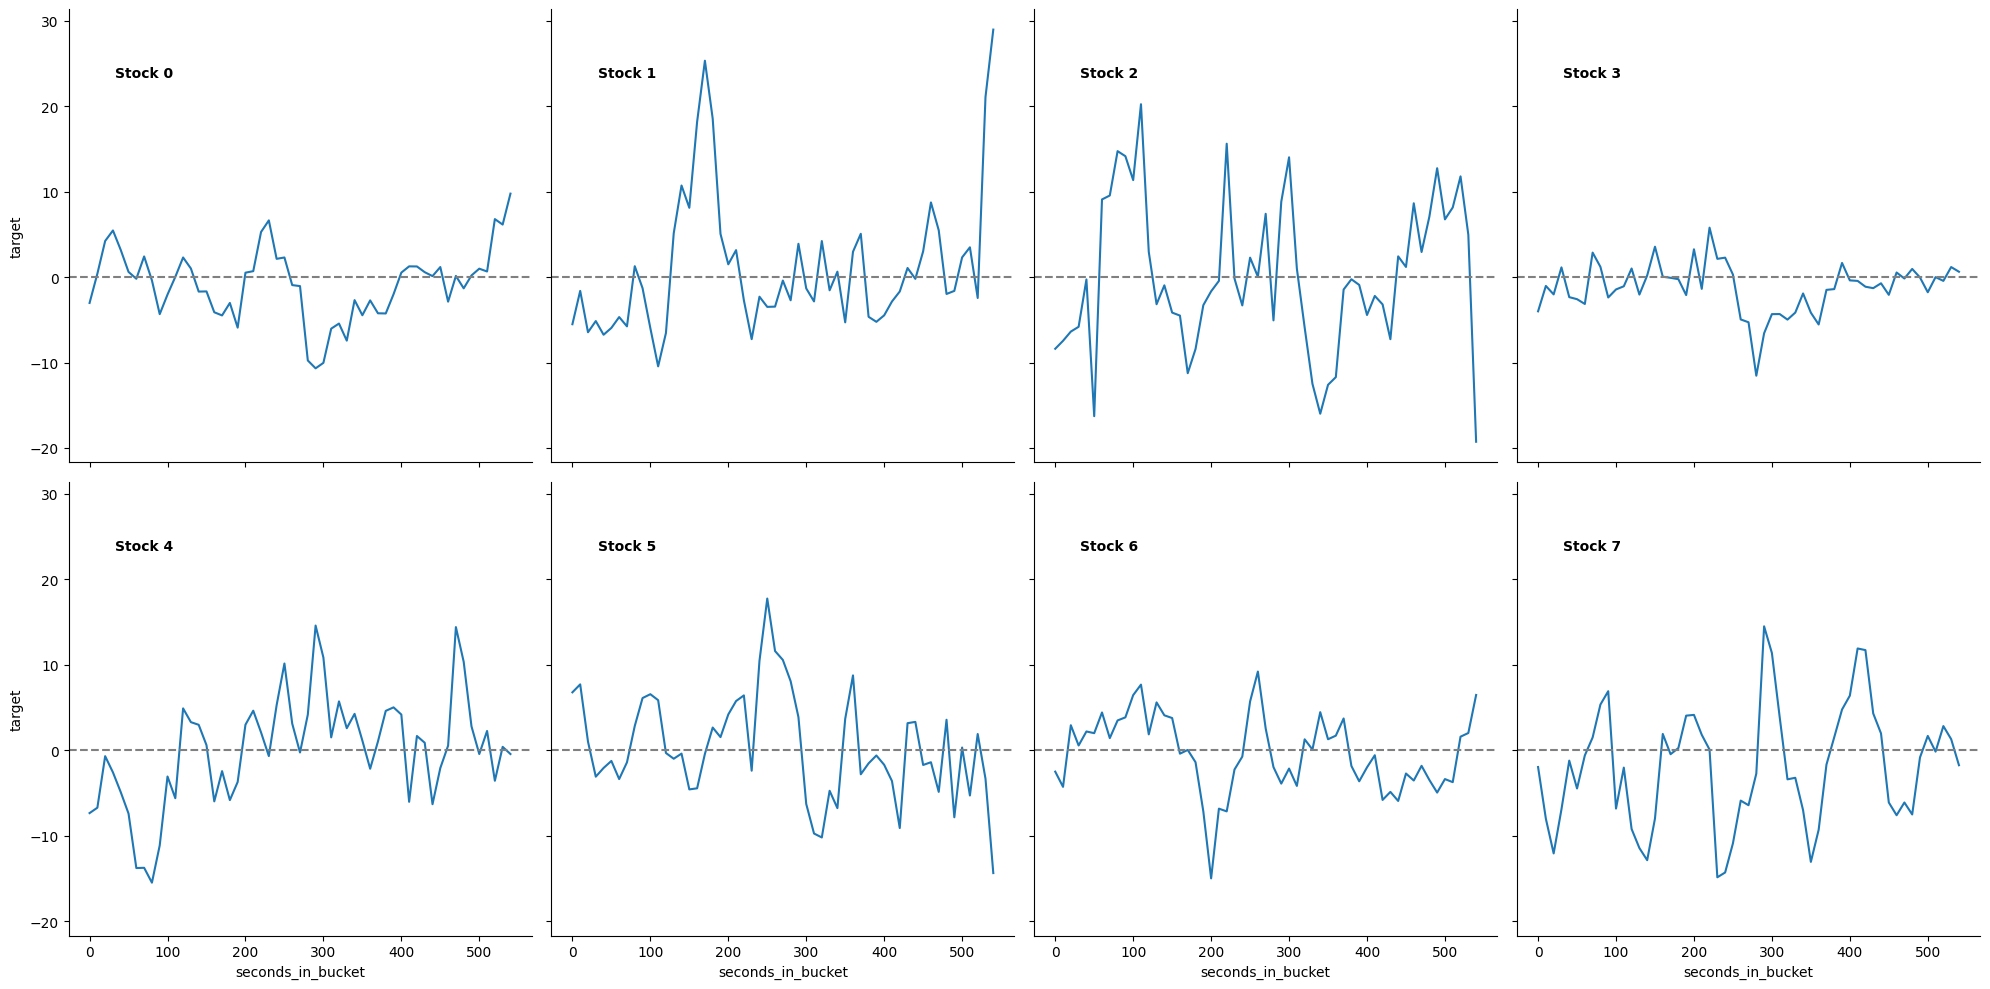

In [5]:
# Graph of the target against the seconds in bucket for the first 8 stocks for the first day
g = sns.relplot(
    data=train.query("date_id == 0 & stock_id < 8"),
    x="seconds_in_bucket",
    y="target",
    kind="line",
    col="stock_id",
    col_wrap=4
)
for stock_id, ax in g.axes_dict.items():
    # Add the title as an annotation within the plot
    ax.text(0.1, .85, f"Stock {stock_id}", transform=ax.transAxes, fontweight="bold")
g.set_titles("")
g.refline(y=0)
g.tight_layout()
plt.show()

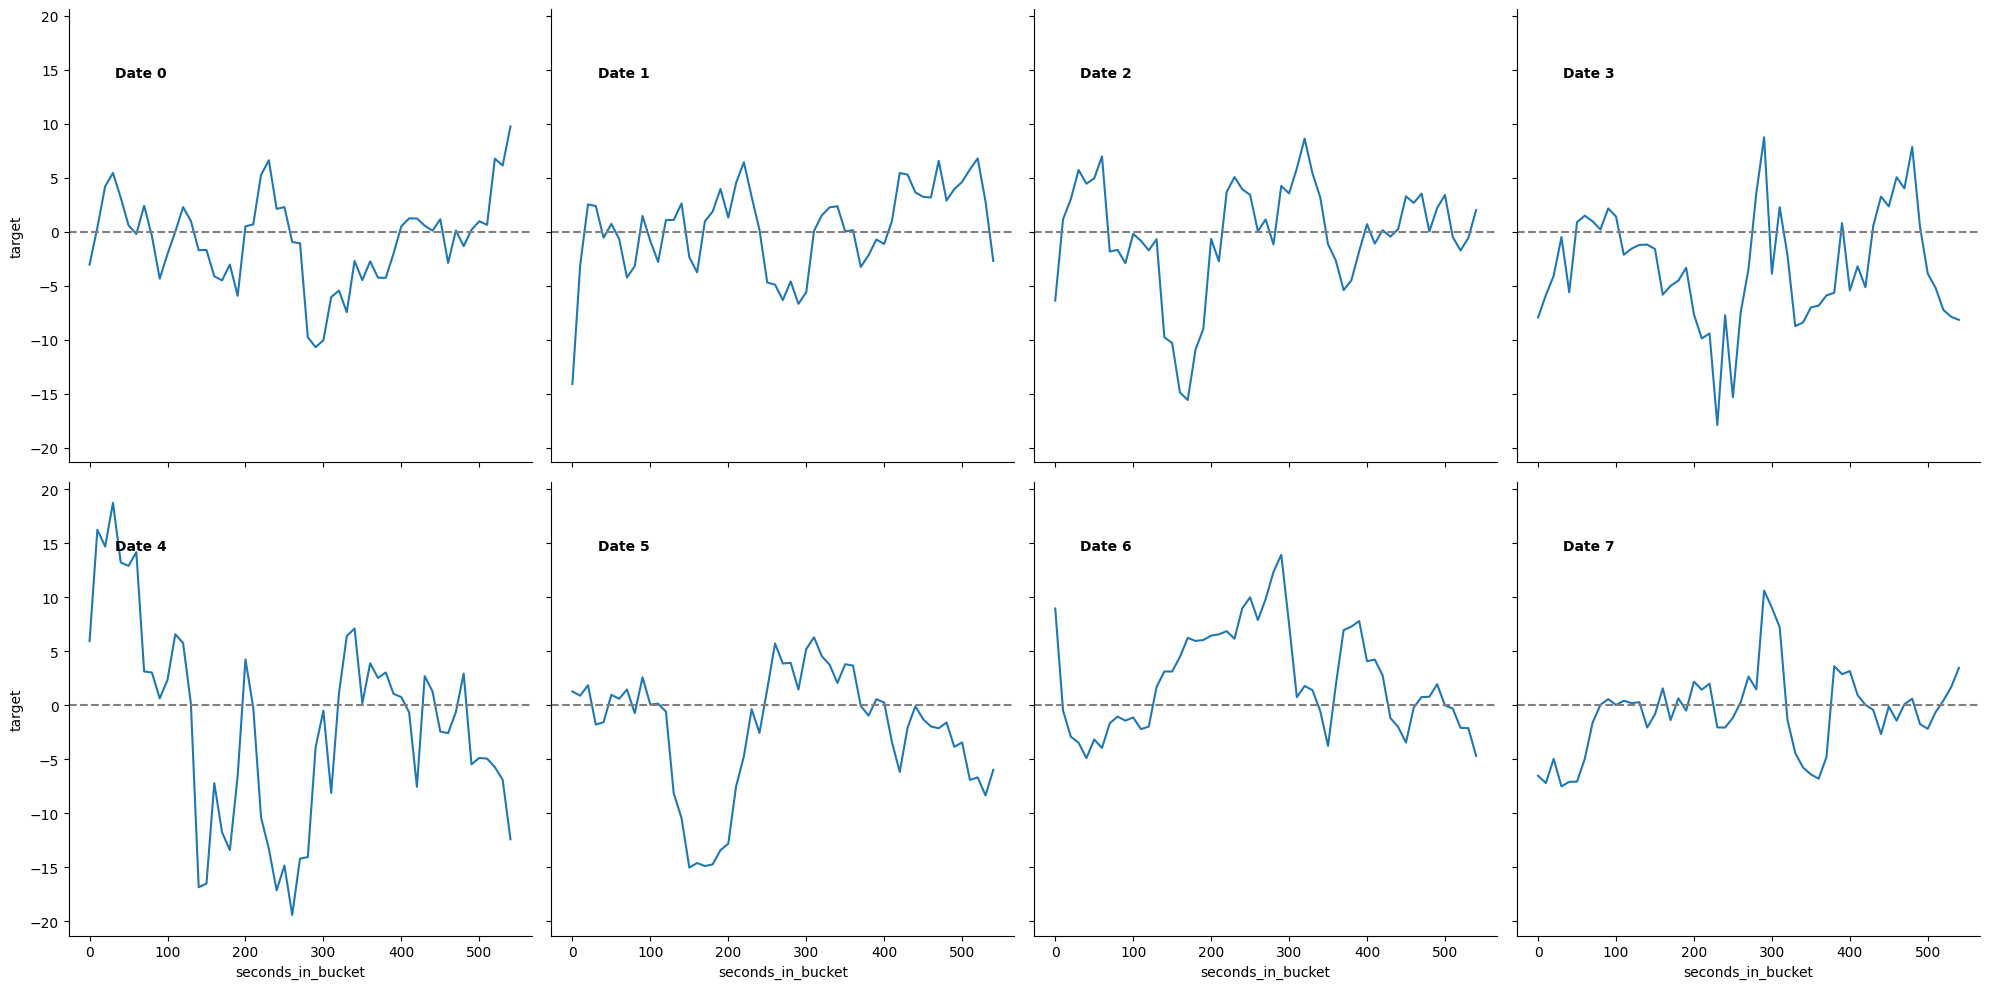

In [6]:
# Graph of the target against the seconds in bucket for the first 8 stocks for the first day
g = sns.relplot(
    data=train.query("date_id < 8 & stock_id == 0"),
    x="seconds_in_bucket",
    y="target",
    kind="line",
    col="date_id",
    col_wrap=4
)
for date_id, ax in g.axes_dict.items():
    # Add the title as an annotation within the plot
    ax.text(0.1, .85, f"Date {date_id}", transform=ax.transAxes, fontweight="bold")
g.set_titles("")
g.refline(y=0)
g.tight_layout()
plt.show()

/var/folders/dh/77csj5hj70b305yqt5ym43vh0000gn/T/ipykernel_34042/563699489.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data=train.query("stock_id < 8").groupby(["stock_id", "date_id"]).mean(),


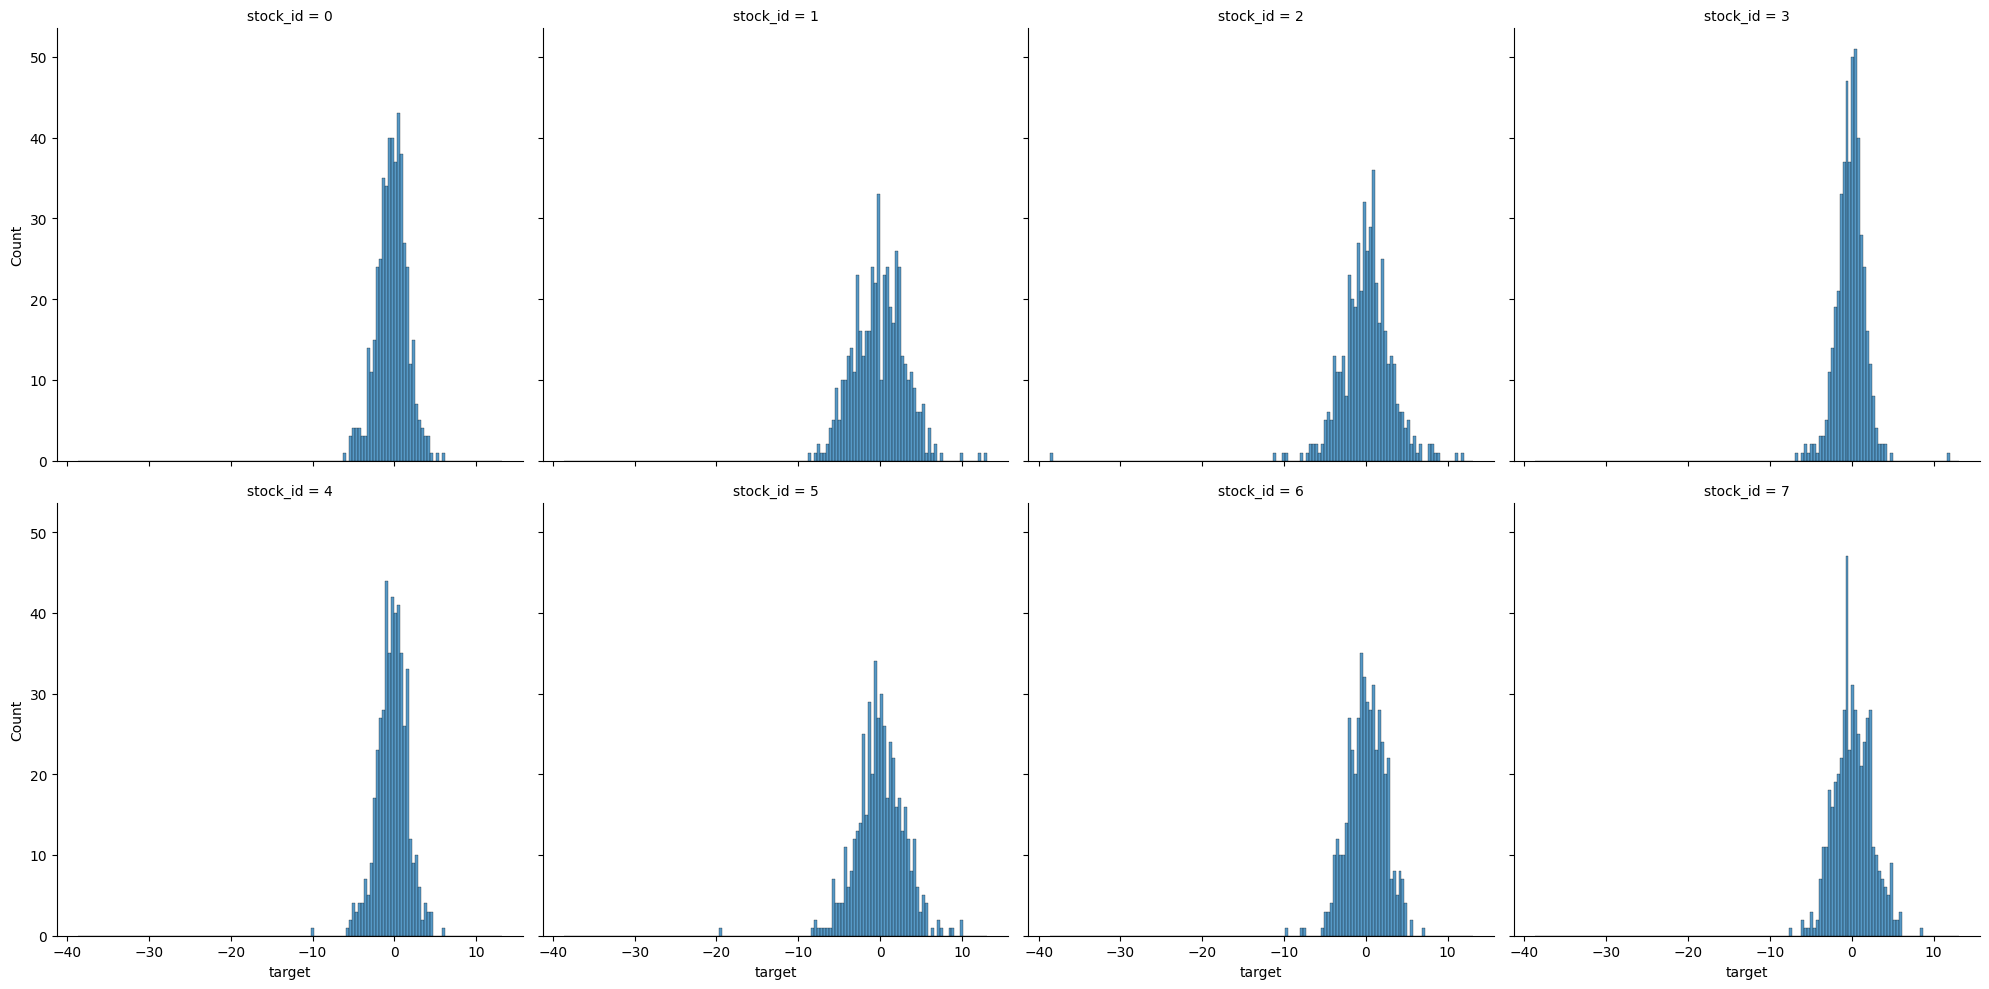

In [7]:
sns.displot(
    data=train.query("stock_id < 8").groupby(["stock_id", "date_id"]).mean(),
    x="target",
    kind="hist",
    col="stock_id",
    col_wrap=4
)

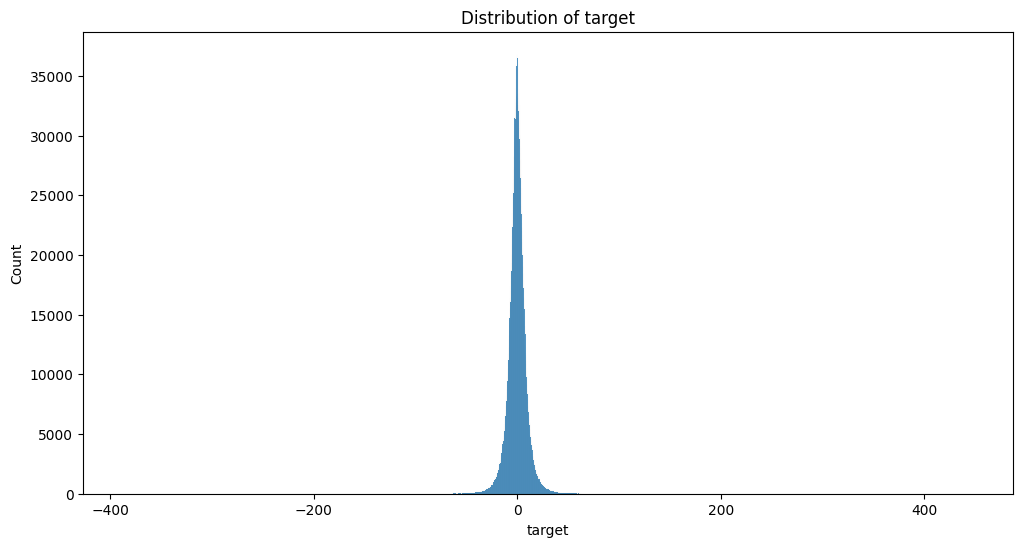

In [8]:
plt.figure(figsize=(12,6))
sns.histplot(data=train,x="target")
plt.title("Distribution of target")
plt.show()

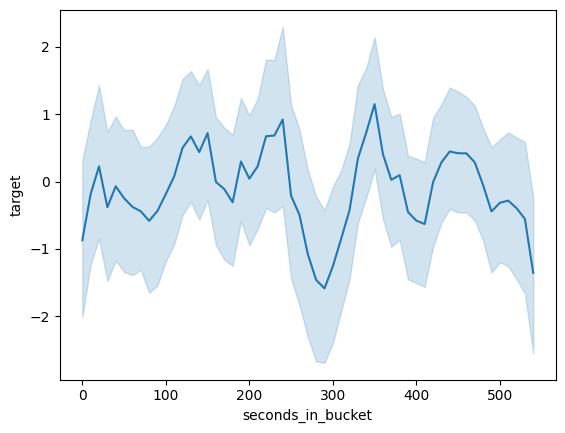

In [9]:

g = sns.lineplot(data=train[train["stock_id"]==1], x="seconds_in_bucket",y="target")

([<matplotlib.patches.Wedge at 0x2eeb1a0d0>,
 [Text(0.3467149598697087, 1.0439294691704735, 'Sell-side'),
  Text(-0.9252379231892767, -0.5949241846591835, 'Buy-side'),
  Text(0.8562297756877622, -0.6905581591913058, 'No imbalance')],
 [Text(0.1891172508380229, 0.5694160740929854, '39.8%'),
  Text(-0.5046752308305145, -0.32450410072319097, '38.6%'),
  Text(0.4670344231024156, -0.3766680868316213, '21.6%')])

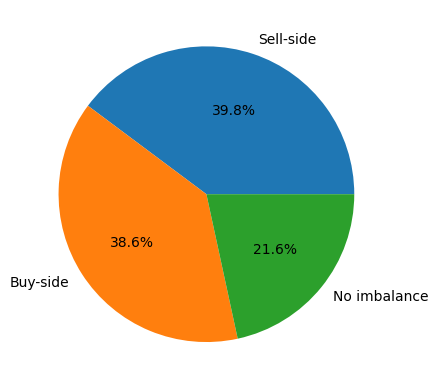

In [10]:
labels = ["Sell-side", "Buy-side", "No imbalance"]
imbalance_flags = train['imbalance_buy_sell_flag'].value_counts()
fig, ax = plt.subplots()
ax.pie(imbalance_flags, labels=labels, autopct='%1.1f%%')

<AxesSubplot: xlabel='seconds_in_bucket', ylabel='Count'>

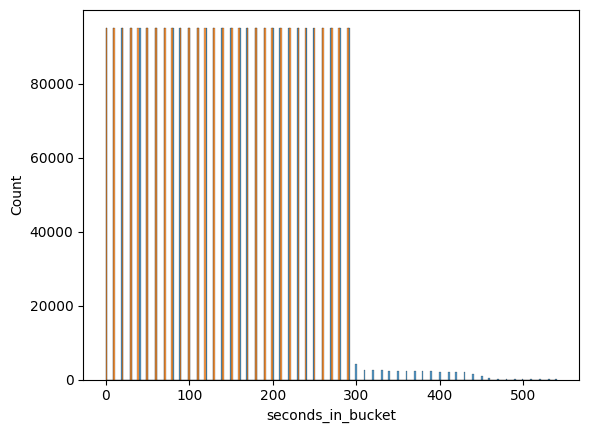

In [11]:
train_far_null = train[train["far_price"].isnull()]
train_near_null = train[train["near_price"].isnull()]
sns.histplot(data=train_far_null,x="seconds_in_bucket")
sns.histplot(data=train_near_null,x="seconds_in_bucket")

<AxesSubplot: xlabel='stock_id', ylabel='Count'>

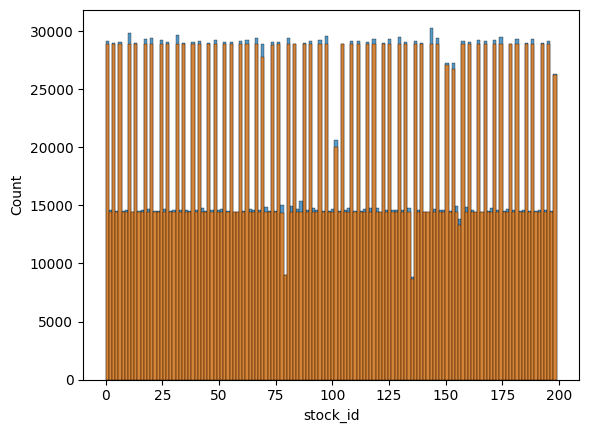

In [12]:
sns.histplot(data=train_far_null, x="stock_id")
sns.histplot(data=train_near_null, x="stock_id")

From analysis of nan values, we realise that most stocks have missing far/near price, and so we should handle the values b

/var/folders/dh/77csj5hj70b305yqt5ym43vh0000gn/T/ipykernel_34042/245790551.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


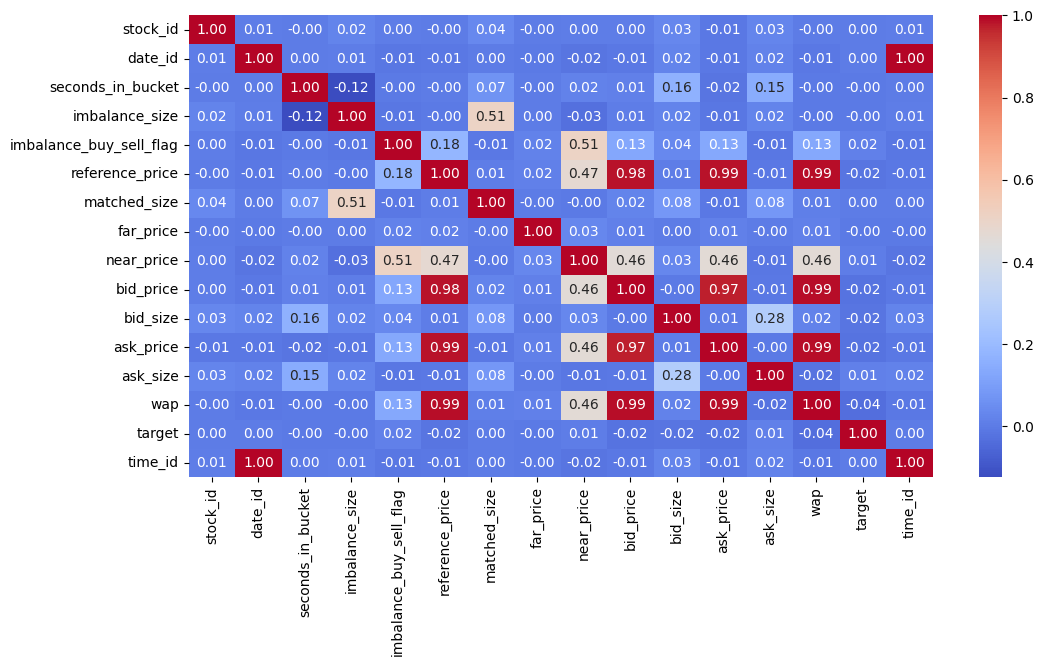

In [13]:
corr_matrix = train.corr()

plt.figure(figsize=(12,6))
sns.heatmap(data=corr_matrix, annot=True,fmt=".2f", cmap="coolwarm")
plt.show()

In [14]:
train["target"].isnull().sum()

88

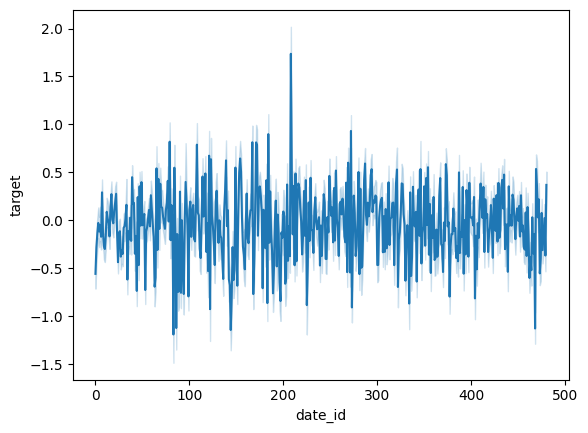

In [19]:
sns.lineplot(data=train, x="date_id",y="target")
plt.show()

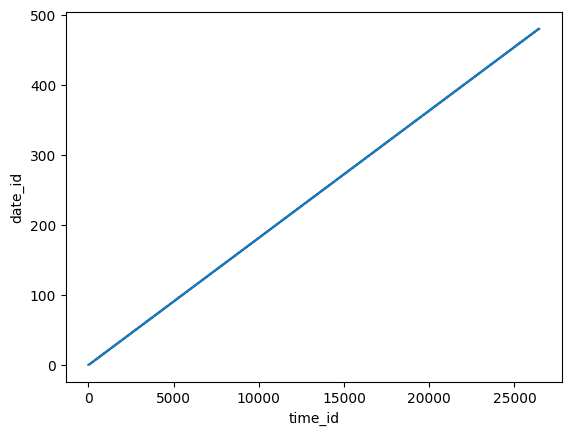

In [30]:
sns.lineplot(data=train[train["stock_id"]==50], x="time_id", y="date_id")
plt.show()

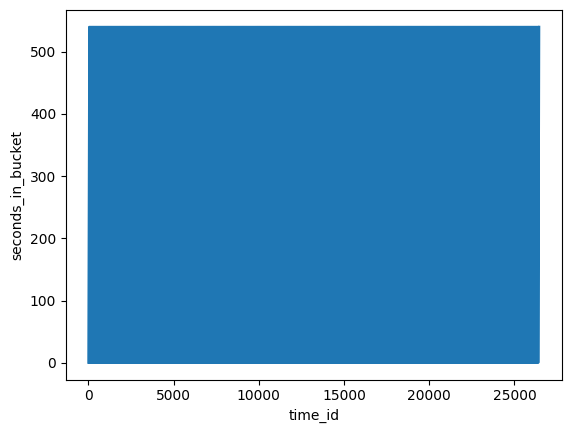

In [31]:
sns.lineplot(data=train[train["stock_id"]==50], x="time_id", y="seconds_in_bucket")
plt.show()